In [1]:
#Using Convolutional Neural Network for Classification problem. 
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# dataset's information https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Finding the number of classes
classes = np.unique(y_train)
nClasses = len(classes)
print("This dataset has {0:d} classes".format(nClasses))

# Defining a dictionaty for label name
y_names = {0: "T-shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

4431872/4422102 [==============================] - 1s 0us/step
This dataset has 10 classes


In [3]:
# dataset's information https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Finding the number of classes
classes = np.unique(y_train)
nClasses = len(classes)
print("This dataset has {0:d} classes".format(nClasses))

# Defining a dictionaty for label name
y_names = {0: "T-shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

This dataset has 10 classes


In [4]:
n_traing_samples = len(x_train)
n_test_sample = len(x_test)
dimension_image = x_train[0].shape 
print("The dimention of each image is {0:d}x{1:d}, the training dataset has {2:d} sample and testing dataset has {3:d} samples".format(dimension_image[0],dimension_image[1],n_traing_samples,n_test_sample))

The dimention of each image is 28x28, the training dataset has 60000 sample and testing dataset has 10000 samples


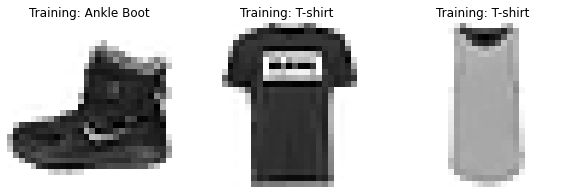

In [5]:
# Showing the first 3 images
_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax, image, label in zip(fig, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Training: %s' % y_names[label])

In [8]:
# To use a CNN model the input's format must be (width x high x channels),
train_X = x_train.reshape((-1, 28,28, 1))
test_X = x_test.reshape((-1, 28,28, 1))

In [7]:
# Changing format from int8 to float32 (Best numerical precision floatingPoints) and normalizing the data.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [9]:
# Transform your labels values into a categorial format or best known as one_hot encoding.
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)
# use train_test_split function to crear validation training set from train data.
# Split data into 80% train and 20% test subsets
X_train_model, X_validation, y_train_model, y_validation = train_test_split(train_X, train_Y_one_hot, test_size=0.2, shuffle=False)

In [10]:
# Importing the required layers operation and activation function to build your model
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
# Defining basic parameters
batch_size = 32
epochs = 15
num_classes = 10

In [12]:
# Buidling your CNN model
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax')) 

In [13]:
# Compiling your model
fashion_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
# Verify the outpur shape for each layer and the number of trainable parameters.
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [15]:
# Train your model
fashion_trained_history = fashion_model.fit(X_train_model, y_train_model, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_validation, y_validation))

Epoch 1/15
1500/1500 [==============================] - 143s 46ms/step - loss: 0.2540 - accuracy: 0.7746 - val_loss: 0.0622 - val_accuracy: 0.8820
Epoch 2/15
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0567 - accuracy: 0.8921 - val_loss: 0.0502 - val_accuracy: 0.8975
Epoch 3/15
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0479 - accuracy: 0.9077 - val_loss: 0.0531 - val_accuracy: 0.8986
Epoch 4/15
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0427 - accuracy: 0.9193 - val_loss: 0.0506 - val_accuracy: 0.9015
Epoch 5/15
1500/1500 [==============================] - 81s 54ms/step - loss: 0.0395 - accuracy: 0.9236 - val_loss: 0.0484 - val_accuracy: 0.9085
Epoch 6/15
1500/1500 [==============================] - 85s 57ms/step - loss: 0.0373 - accuracy: 0.9290 - val_loss: 0.0511 - val_accuracy: 0.9076
Epoch 7/15
1500/1500 [==============================] - 88s 58ms/step - loss: 0.0338 - accuracy: 0.9352 - val_loss: 0.0585 

In [18]:
# Evaluating the performance of the model usign the validation data
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print("The loss of the model is {0:f}, and the accurracy is {1:f}".format(test_eval[0],test_eval[1]))

313/313 [==============================] - 7s 21ms/step - loss: 0.0972 - accuracy: 0.8900
The loss of the model is 0.097191, and the accurracy is 0.890000


In [ ]:
# using fashion_trained_history information to provide the performance of the model during the training stage
accuracy = fashion_trained_history.history['accuracy']
val_accuracy = fashion_trained_history.history['val_accuracy']
loss = fashion_trained_history.history['loss']
val_loss = fashion_trained_history.history['val_loss']
epochs = range(len(accuracy))

In [ ]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Predicting the new data "test_X, y_test"
predicted = fashion_model.predict(test_X)

# taking the max argument
predicted = np.argmax(np.round(predicted),axis=1)
print(predicted.shape)
print(y_test.shape)
#print("size fo predicted array {0:d}x{1:d} and size of y_test array {2:d}".format(predicted.shape[0],predicted.shape[1],y_test.shape))

In [ ]:
# Now let's select those samples that were correctly classified.
correct = np.where(predicted==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[correct], y_test[correct]))
    plt.tight_layout()

In [ ]:
# Now let's select those samples that were incorrectly classified.
incorrect = np.where(predicted!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [ ]:
#Printing Classification reports
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted, target_names=target_names))